# Lab 01 - Early Fire Detection in Remote Areas
### Exploratory Data Analysis

Wildfires have become a major global concern. Recent news reports show that California (US) is experiencing an environmental catastrophe, with one of the most devastating fires in recent years causing considerable ecological and infrastructure damage.

Advances in artificial intelligence (AI) offer interesting opportunities for improving early fire detection. AI-powered systems can detect fire outbreaks in their early phases, allowing for rapid response and mitigation efforts.


This lab will investigate the intersection of AI and sustainability via the perspective of early fire detection in remote locations, developing approaches to simulate fire monitoring systems.

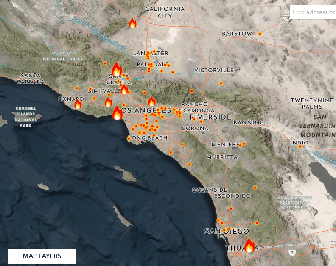

Image from [ESRI disaster-response](https://https://www.esri.com/en-us/disaster-response/disasters/wildfires)

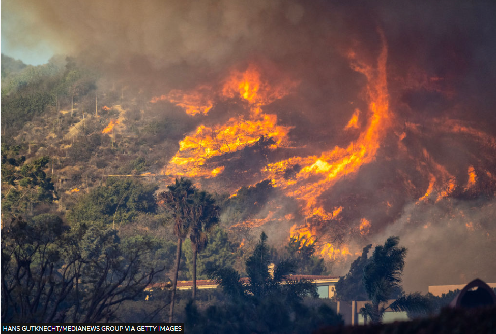

Image from [BBC](https://www.bbc.co.uk/news/resources/idt-6789cf28-d4de-4dfd-9f4f-cf51ef1d6a54)


### Gathering Data

First, explore the [Forest Fire Dataset](https://www.kaggle.com/datasets/mohnishsaiprasad/forest-fire-images).

Begin by downloading the resources. Kaggle offers an API for managing downloads through Kagglehub.

In [1]:
import kagglehub

# Download the latest version of the dataset.

path = kagglehub.dataset_download("mohnishsaiprasad/forest-fire-images")

print("Path to dataset files:", path)

Path to dataset files: /Users/sean/.cache/kagglehub/datasets/mohnishsaiprasad/forest-fire-images/versions/1


Move the dataset folder to a more accessible location.

In [2]:
import shutil
import os

Data_path = './early_fire_detection'

# Make sure the destination directory exists (create if it doesn't)
if(not(os.path.exists(Data_path))):
   os.makedirs(Data_path, exist_ok=True)
   shutil.move(path, Data_path)
   # Move the folder
   print(f"Moved folder from {path} to {Data_path}")


Open and visualize an example image:

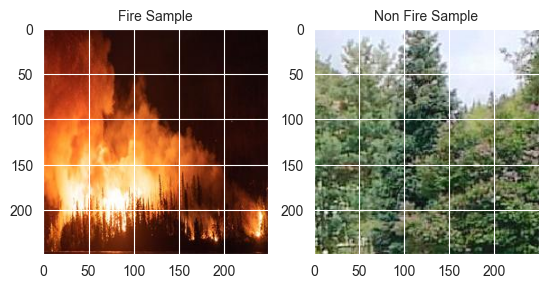

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

fire_sample_image = Image.open(Data_path+'/1/Data/Train_Data/Fire/F_0.jpg')
non_fire_sample_image = Image.open(Data_path+'/1/Data/Train_Data/Non_Fire/NF_10.jpg')

fig, axes = plt.subplots(1, 2)
axes = axes.flatten()

axes[0].imshow(fire_sample_image)
axes[0].set_title('Fire Sample', fontsize=10)

axes[1].imshow(non_fire_sample_image)
axes[1].set_title('Non Fire Sample', fontsize=10)

plt.show()



## **Challenge 01**

Load the remaining images by writing the necessary `TODO X` code.

In [4]:
import numpy as np
import os
import glob

Start by defining the appropriate paths:

In [5]:
# TODO 1 - Complete the image directory paths.
# **Tip:** Utilize the `os.path.join` function to create file paths dynamically instead of hardcoding.



# ----------answer-----------------------
dataset_dir = Data_path+'/1/Data'
train_dir = os.path.join(dataset_dir, 'Train_Data')
test_dir = os.path.join(dataset_dir, 'Test_Data')
#----------------------------------

Now let's use glob to get the path for each image

In [6]:
# TODO 2 - Use `glob` to retrieve the paths for each image.

# * The `glob` module helps you find all files matching a specified pattern. Use it to collect all image file paths in your directory.


# ----------answer-----------------------
train_data_images = {
    "Fire":  glob.glob(os.path.join(train_dir, 'Fire/*.jpg')),
    "Non_Fire": glob.glob(os.path.join(train_dir, 'Non_Fire/*.jpg'))
}
test_data_images = {
    "Fire":glob.glob(os.path.join(test_dir, 'Fire/*.jpg')),
    "Non_Fire": glob.glob(os.path.join(test_dir, 'Non_Fire/*.jpg'))
}
#----------------------------------

Visualize the image paths:


In [7]:
print('Train fire: ',train_data_images['Fire'][0])
print('Train non_fire: ',train_data_images['Non_Fire'][0])
print('Test fire: ',train_data_images['Fire'][0])
print('Test non_fire: ',train_data_images['Non_Fire'][0])

Train fire:  ./early_fire_detection/1/Data/Train_Data/Fire/F_308.jpg
Train non_fire:  ./early_fire_detection/1/Data/Train_Data/Non_Fire/NF_430.jpg
Test fire:  ./early_fire_detection/1/Data/Train_Data/Fire/F_308.jpg
Test non_fire:  ./early_fire_detection/1/Data/Train_Data/Non_Fire/NF_430.jpg


Begin by loading each image. Note that some images may be corrupted.

In [8]:
X, y, X_test, y_test = [], [], [], []




# ----------answer-----------------------
for data_set, paths_dict in [('train',train_data_images),('test', test_data_images)]: #iterate between the train and test directories.
  for d_keys in paths_dict: # the Fire and Non_Fire labels
    for image_path in paths_dict[d_keys]: # each image
      try:
        with Image.open(str(image_path)) as img:
            # Convert Pillow Image to NumPy array
            img_array = np.array(img)

            if data_set == 'train':
              X.append(img_array)
              y.append(d_keys)
            else:
              X_test.append(img_array)
              y_test.append(d_keys)
      except Exception as e:
        pass
#----------------------------------

Let's verify the images:

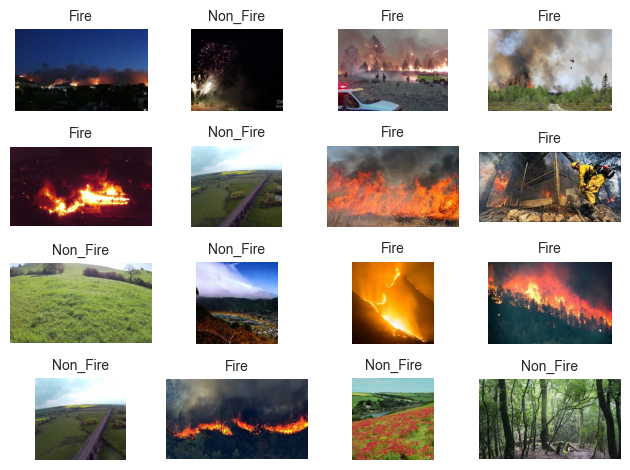

In [9]:
import random

total_images = 16

combined_list = list(zip(X, y))
Samples = random.sample(combined_list, 16)


grid_size = (4,4)

fig, axes = plt.subplots(grid_size[0], grid_size[1])
axes = axes.flatten()

for idx in range(total_images):
    ax = axes[idx]
    ax.axis('off')


    img, label = Samples[idx]

    ax.imshow(img)
    ax.set_title(label, fontsize=10)


plt.tight_layout()
plt.show()

## **Challenge 02**

Some images in the dataset have varying sizes. To ensure consistency, we need to standardise their sizes. Additionally, we must normalise the image pixel values and convert the labels from text to numerical representations. Below are the `TODO X` tasks required to achieve these objectives:


In [10]:
from skimage.transform import resize

#pip install opencv-python
import cv2
# TODO 1 - resize the images


# ----------answer-----------------------
from tqdm import tqdm
img_height = 100  # Desired image height
img_width = 100   # Desired image width
number_of_channels = 3

X = [ cv2.resize(x, (img_height,img_width)) for x in tqdm(X) ]
X_test = [ cv2.resize(x, (img_height,img_width)) for x in tqdm(X_test) ]

# ----------------------------------

100%|██████████| 50/50 [00:00<00:00, 2587.73it/s]


Some images in the dataset have non-homogeneous dimensions, which can cause issues during processing. Let's identify and remove these images to ensure dimensional consistency across the dataset.

In [11]:

indices_to_remove = [i for i, x in enumerate(X) if np.shape(x) != (img_height,img_width,number_of_channels)]

if len(indices_to_remove) > 0:

  print('Example of Non-Homogeneous image: ', np.shape(X[indices_to_remove[0]]))
  print('Total Number in train set:',len(indices_to_remove)  )


  y = [item for idx, item in enumerate(y) if idx not in indices_to_remove]
  X = [item for idx, item in enumerate(X) if idx not in indices_to_remove]

indices_to_remove = [i for i, x in enumerate(X_test) if np.shape(x) != (img_height,img_width,number_of_channels)]

if len(indices_to_remove) > 0:

  print('Total Number in test set:',len(indices_to_remove)  )


  y_test = [item for idx, item in enumerate(y_test) if idx not in indices_to_remove]
  X_test = [item for idx, item in enumerate(X_test) if idx not in indices_to_remove]




Example of Non-Homogeneous image:  (100, 100, 4)
Total Number in train set: 14
Total Number in test set: 1



Now, let’s normalise the images. What is the maximum value used to represent a pixel?

In [12]:
# ----------------------------------


# ----------answer-----------------------
X = np.array(X)
X_test = np.array(X_test)

X = X.astype('float32')
X_test = X_test.astype('float32')

X /= 255
X_test /= 255
# ----------------------------------

Let’s convert the labels into a numerical format.

In [13]:
# TODO 3 - Transform the labels into a numerical format to ensure they are suitable for model training.

print(y[:5])


# ----------answer-----------------------
label_map = {
    "Fire":0,"Non_Fire":1
}

y = [label_map[l] for l in y]
y_test = [label_map[l] for l in y_test]
# ----------------------------------

print(y[:5])

['Fire', 'Fire', 'Fire', 'Fire', 'Fire']
[0, 0, 0, 0, 0]


## **Challenge 03**

Complete the missing code `TODO X` to visualise the dataset and apply balancing techniques to ensure class distributions are uniform.

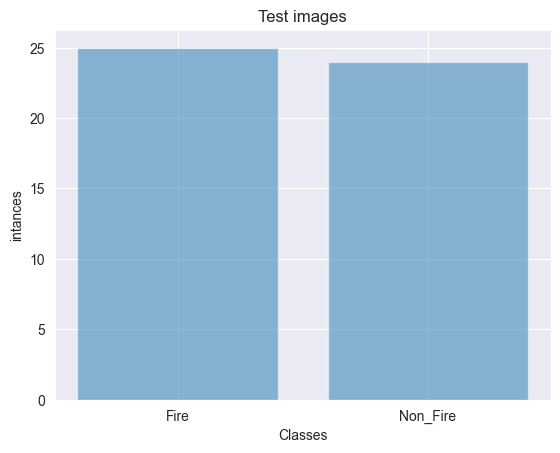

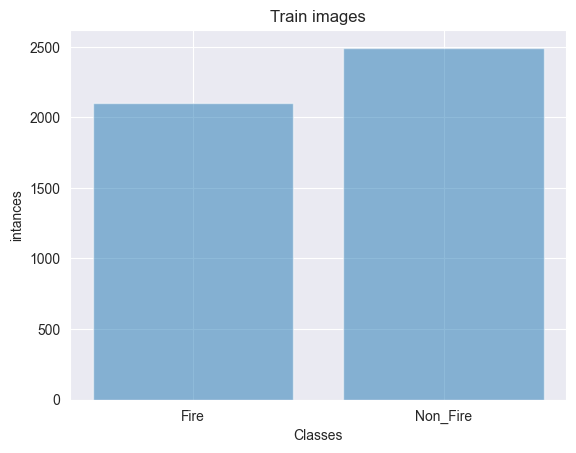

In [14]:
# TODO 1 - Visualise the dataset balance to identify any class imbalances by plotting the distribution of samples across different classes.


# ----------answer-----------------------
from collections import Counter


counter = Counter(y_test)
plt.bar(label_map.keys(), counter.values(), align='center', alpha=0.5)
plt.ylabel('intances')
plt.xlabel('Classes')
plt.title('Test images')
plt.show()

counter = Counter(y)
plt.bar(label_map.keys(), counter.values(), align='center', alpha=0.5)
plt.ylabel('intances')
plt.xlabel('Classes')
plt.title('Train images')
plt.show()
# ----------------------------------

In [15]:
# TODO 2 - Balance the dataset by reducing the number of samples in the overrepresented class. Remove excess samples from the class with more images.



# ----------answer-----------------------
from collections import Counter
counter = Counter(y)

non_fire_indicies = [i for i, label in enumerate(y) if label == 1]
num_samples_to_remove = counter[1] - counter[0]
indices_to_remove = random.sample(non_fire_indicies, num_samples_to_remove)


y = np.delete(y, indices_to_remove)
X = np.delete(X, indices_to_remove, axis=0)
# ----------------------------------

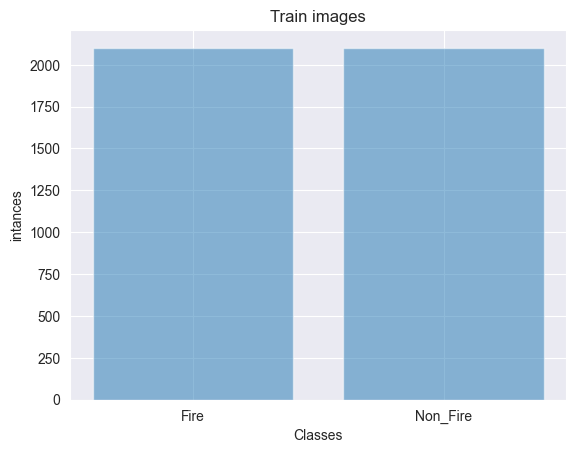

In [16]:
# TODO 3 - Use the visualisation code to check the new distribution of the dataset.



# ----------answer-----------------------
from collections import Counter



counter = Counter(y)
plt.bar(label_map.keys(), counter.values(), align='center', alpha=0.5)
plt.ylabel('intances')
plt.xlabel('Classes')
plt.title('Train images')
plt.show()
# ----------------------------------

 Statistical Analysis of Image Dataset: Analyse the color histograms for each class to identify distinguishing features

In [17]:
#TODO 4 - Let’s calculate the colour histogram of each image class.


# ----------answer-----------------------
def calculate_color_histograms(images, bins=10):
    histograms = {'red': [], 'green': [], 'blue': []}
    for idx, image in enumerate(images):


      # Split the image into R, G, B channels
      red_channel = image[:, :, 0]
      green_channel = image[:, :, 1]
      blue_channel = image[:, :, 2]
      hist_red, _ = np.histogram(red_channel, bins=bins, range=(0, 1), density=True)
      hist_green, _ = np.histogram(green_channel, bins=bins, range=(0, 1), density=True)
      hist_blue, _ = np.histogram(blue_channel, bins=bins, range=(0, 1), density=True)
      histograms['red'].append(hist_red)
      histograms['green'].append(hist_green)
      histograms['blue'].append(hist_blue)


      avg_histograms= {'red': [], 'green': [], 'blue': []}

      avg_histograms['red'] = np.mean(np.stack(histograms['red'], axis=0), axis=0)
      avg_histograms['green'] =np.mean(np.stack(histograms['green'], axis=0), axis=0)
      avg_histograms['blue'] = np.mean(np.stack(histograms['blue'], axis=0), axis=0)

    return avg_histograms

# ----------------------------------------

hist_features_fire = calculate_color_histograms([x for x, label in zip(X,y) if label == 0])
hist_features_nonfire = calculate_color_histograms([x for x, label in zip(X,y) if label == 1])




Visualising the distribution for each colour

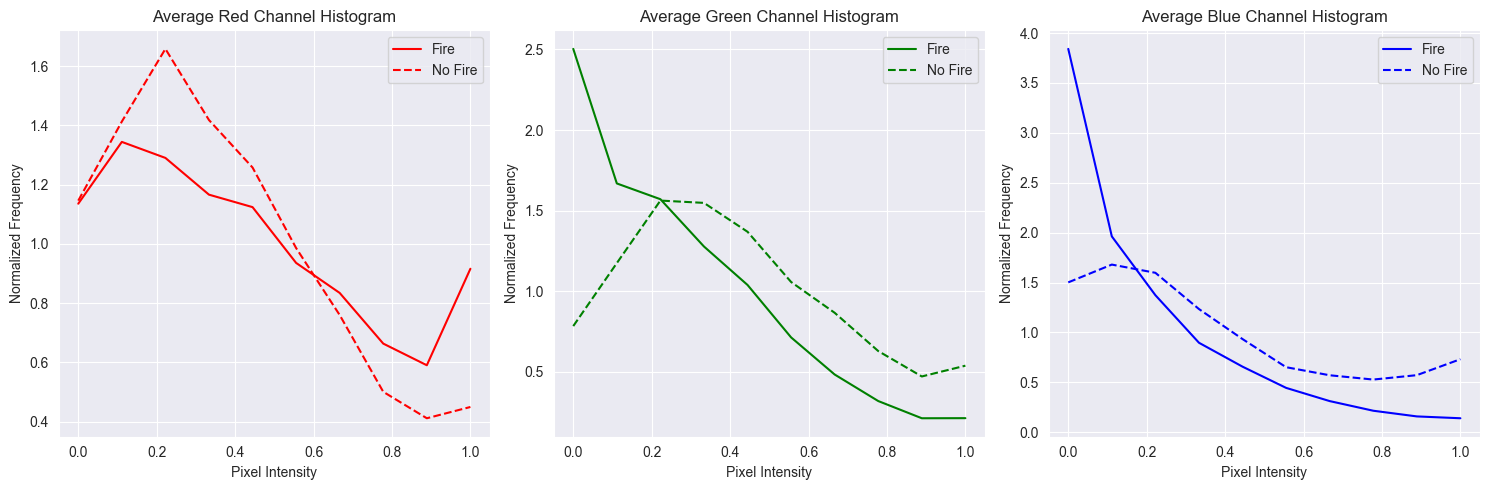

In [18]:
def plot_average_histograms(avg_hist_fire, avg_hist_no_fire, bins=10):

  bin_edges = np.linspace(0, 1, bins)

  colors = ['red', 'green', 'blue']
  plt.figure(figsize=(15, 5))

  for i, color in enumerate(colors, 1):
      plt.subplot(1, 3, i)
      plt.plot(bin_edges, avg_hist_fire[color], color=color, label='Fire')
      plt.plot(bin_edges, avg_hist_no_fire[color], color=color, linestyle='--', label='No Fire')
      plt.title(f'Average {color.capitalize()} Channel Histogram')
      plt.xlabel('Pixel Intensity')
      plt.ylabel('Normalized Frequency')
      plt.legend()

  plt.tight_layout()
  plt.show()

plot_average_histograms(hist_features_fire,hist_features_nonfire)

In [19]:
#TODO 5 - Lastly, let’s shuffle the dataset to ensure the data is randomly distributed, reducing potential biases during training.



# ----------answer-----------------------

seed = 7
random.seed(seed)
combined = list(zip(X, y))
combined_test = list(zip(X_test,y_test))

# Shuffle the combined list in place
random.shuffle(combined)
random.shuffle(combined_test)

# Unzip the combined list back into X and y
X_shuffled, y_shuffled = zip(*combined)
X_shuffled_test, y_shuffled_test = zip(*combined_test)

# Convert back to lists (optional)
X = np.array(list(X_shuffled))
y = np.array(list(y_shuffled))
X_test = np.array(list(X_shuffled_test))
y_test = np.array(list(y_shuffled_test))

# ----------------------------------

## **Challenge 04**




To finish up, let's save our data to ensure that all your progress is securely stored.

In [20]:
# ----------answer-----------------------
save_path = 'processed_data'
os.makedirs(save_path,exist_ok=True)
np.save(os.path.join(save_path, 'X.npy') ,X )
np.save(os.path.join(save_path, 'X_test.npy') ,X_test )
np.save(os.path.join(save_path, 'y.npy') ,y )
np.save(os.path.join(save_path, 'y_test.npy') ,y_test )

Download the folder for future labs.


In [21]:
# use this if working with Google colab to download data files
_googlecolab=False
if(_googlecolab):
    import shutil
    from google.colab import files
    
    # Step 1: Compress the folder
    folder_to_download = 'processed_data'
    shutil.make_archive(folder_to_download, 'zip', folder_to_download)
    
    # Step 2: Download the zipped folder
    files.download(f'{folder_to_download}.zip')